## Escape Velocity: how to leave the Earth.... and the Solar System

#### Author: Amanda Alexander
#### Date: 8 September 2020

### Learning Goals
1. Practice using numpy arrays, pandas dataframes and basic plotting with matplotlib in python
2. Familiarize with the concept of escape velocity and compute it for each planet in the Solar System
3. Visualize the effect of mass and distance from a gravitational source and the velocity needed to escape
4. Determine the escape velocity needed to leave the Solar System

### Background

**Escape velocity** is the minimum velocity which an object must have in order to escape the *gravitational influence* of a particular planet or other object. 

**Gravity** is the force pulling together all matter. The more matter, the more gravity, so things that have a lot of matter such as planets and moons and stars pull more strongly. The strength of gravity also depends how close you are to the massive source (and the further away you are, the weaker the gravitational influence). 

**Mass** is the measure of the amount of matter in something. The more massive something is, the more of a gravitational pull it exerts. Here on Earth, as we walk on the surface, the Earth pulls on us AND we pull back on the Earth! But since the Earth is so much more massive, the pull from us is not strong enough to move the Earth.

Mathematically, escape velocity is derived from the concept that if the *kinetic energy* of an object launched was equal in magnitude to the *gravitational potential energy*, then in the absence of friction resistance it could escape from the Earth.

**Kinetic energy** is the measure of a mass in motion. The more massive something is, and the faster it is moving -- the more kinetic energy it will have. Kinetic energy is measured in units of 
$$ KE = \frac{1}{2}mv^2$$

**Gravitational potential energy** is the measure of the gravitational influence on a mass near another more massive object. To visualize this, let's consider how the Earth experiences gravitational potential energy from the Sun. The amount of gravitational potential energy the Earth has depends on the mass of the Earth, the mass of the Sun, and the distance from the Earth to the Sun. If the Earth were smaller and farther away (like Mars for example), then it would have less gravitational potential energy. *Note: M is the mass of the larger body (to escape from), and m is the mass of the smaller body (the one doing the escaping) and since m <<< M, m+M is essentially equal to M*

$$ GPE = \frac{GMm}{r} $$

Kinetic and gravitational potential energy are measured in units of $joules$ (or $ \left[\frac{kg⋅m^2}{s^{−2}}\right]$ in SI units).

By setting the two equal, we can solve for the velocity. Velocity is measured in units of $m/s$. 

$$ V_{esc} = \sqrt{\frac{2GM}{r}}$$

where $M$ is the mass of the body to escape, $G$ is Newton's gravitational constant and $r$ is the distance from the center of mass of the body creating a gravitational influence. 



<center><img src="aa_escape_vel_sketch.png" width=600 height =600/><center/>


### Example

Since escape velocity depends on the mass of and distance from the object of gravitational influence we are trying to escape, let's consider how much easier it is to escape the Earth versus the Sun. 

For reference, the mass of the sun ($M_{sun}$) is $1.989 × 10^{30} kg$, the mass of the Earth ($M_{earth}$) is $5.972 × 10^{24} kg$ and Newton's gravitational constant ($G$) is $6.674×10^{-11} \frac{m^3}{kg^1s^2}$. The distance to the Sun's center from Earth ($r_{sun}$) is $1.496x10^{11} m$ and the distance to Earth's center from Earth's surface ($r_{earth}$) is $6.371 x 10^6 m$.

In [1]:
# First, let's import the necessary libraries that we will use
import numpy as np
from matplotlib import pyplot as plt  
import math
import pandas as pd

[   1000.           53578.94736842  106157.89473684  158736.84210526
  211315.78947368  263894.73684211  316473.68421053  369052.63157895
  421631.57894737  474210.52631579  526789.47368421  579368.42105263
  631947.36842105  684526.31578947  737105.26315789  789684.21052632
  842263.15789474  894842.10526316  947421.05263158 1000000.        ]


Text(0.5, 1.0, 'relationship between escape velocity and distance (an inverse square-root)')

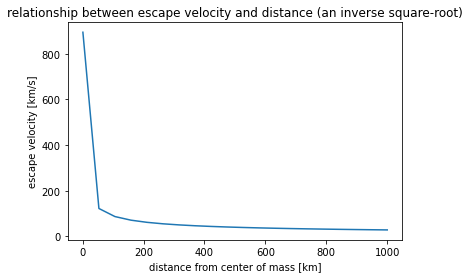

In [2]:
# Now, let's illustrate the influence of distance from gravitational influence and escape velocity
# Let's make a pretend array of distances (in meters)
distance_array = np.linspace(1000, 1E6, 20) # from 1000 m to 1 million m in 20 steps
print(distance_array)

# Let's set a mass constant so that only distance is changing
mass = 6E24 # [kg]

# Compute the escape velocity for each distance point in the array
G              = 6.67E-11                                  # Newton's gravitational constant [m3/kgs2]
escape_v_array = np.sqrt((2*G*mass)/distance_array) /1000  # converted to km/s

# We can make a quick plot to show the relationship
plt.plot(distance_array/1000, escape_v_array)
plt.xlabel('distance from center of mass [km]')
plt.ylabel('escape velocity [km/s]')
plt.title("relationship between escape velocity and distance (an inverse square-root)")

In [3]:
# Next, let's read in the data needed to compute escape velocity
# we will use the pandas dataframe csv function to do this
df = pd.read_csv("ss_data.csv")

# We can find out the column names like so
print(df.columns)

# We can find out the index for a given body 
print(df.body)

# Note, the units of 'r' are in meters, and are measured from the center of the body
# For the sun, the distance 'r' is set from Earth to the center of the sun
# The units for 'm', or mass of the body are in kg

Index(['body', 'r', 'm'], dtype='object')
0         sun
1     mercury
2       venus
3       earth
4        moon
5        mars
6     jupiter
7      saturn
8      uranus
9     neptune
10      pluto
Name: body, dtype: object


In [4]:
# Now, let's get the relevant data needed to compute escape vel for Sun and Earth
sun_r   = df.r[0] # distance to the sun from earth in m
sun_m   = df.m[0] # mass of the sun in kg
earth_r = df.r[3] # distance to the center of the earth from the surface in m
earth_m = df.m[3] # mass of the earth in kg

# Let's compute escape vel using the equation introduced above
G           = 6.67E-11                               # Newton's gravitational constant [m3/kgs2]
esc_v_sun   = math.sqrt((2*G*sun_m)/sun_r) /1000     # converted to km/s
esc_v_earth = math.sqrt((2*G*earth_m)/earth_r) /1000 # converted to km/s

print("The escape velocity from the Sun at Earth is {:0.3f} km/s".format(esc_v_sun))  # print using float precision to 3 spaces after the decimal
print("The escape velocity from Earth's surface is {:0.3f} km/s".format(esc_v_earth)) # print using float precision to 3 spaces after the decimal

The escape velocity from the Sun at Earth is 42.069 km/s
The escape velocity from Earth's surface is 11.173 km/s


### Questions

1. Print the contents of the solar system data file "ss_data.csv" using the pandas dataframe (df)

In [ ]:
# input code here, hint: be sure to run cells above first and then your df will already be established

2. Compute the escape velocity for each body is ss_data.csv and print

In [ ]:
# input code here

3. Plot the escape velocity for each body in ss_data.csv as a function of mass and then as a function of radius

In [ ]:
# input code here

4. What do you think is the escape velocity for the solar system? Hint: you have already computed it. 